<center>

<h1>Master en Management & Analytics - ITBA</h1>
</center>

            

### Alumno: Priolo Juan
### Notebook 1 - ETL

# <span style="color:blue"> Introducción 

En esta **Notebook** se llevará a cabo **únicamente** el proceso de ETL (Extracting, Transforming & Loading) para en futuras instancias predecir propiedades del acero trefilado utilizando diferentes modelos de **Machine Learning**. 

**Objetivos generales del proyecto:**

a) Análisis Exploratorio de los datos que nos permitirá una mejor interpretación de la información
b) Comparar diferentes modelos de Machine Learning utilizando diferentes métricas para ellos (MSE y R2)

A continuación se irán describiendo diferentes etapas.

In [66]:
# Importar el DATASET
import pandas as pd

# Ruta del archivo CSV
DATASET = "C:/Users/60056808/Desktop/Trabajo Final Magister/TP final Maestria MMA/Jupyter avances/data/MatNavi Mechanical properties of low-alloy steels.csv"

# Cargar el archivo CSV especificando la codificación
DATASET = pd.read_csv(DATASET, encoding='latin1')

# Mostrar las primeras filas del dataset para verificar
print(DATASET.head())


  Alloy code     C    Si    Mn      P      S     Ni    Cr    Mo    Cu    V  \
0        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
1        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
2        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
3        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
4        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   

      Al       N  Ceq  Nb + Ta   Temperature (°C)   0.2% Proof Stress (MPa)  \
0  0.003  0.0066  0.0      0.0                 27                       342   
1  0.003  0.0066  0.0      0.0                100                       338   
2  0.003  0.0066  0.0      0.0                200                       337   
3  0.003  0.0066  0.0      0.0                300                       346   
4  0.003  0.0066  0.0      0.0                400                       316   

    Tensile Strength (MPa)   Elongation (%)   Reduction 

In [69]:
DATASET.info()

# Ajustar opciones para mostrar toda la información
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas

# Mostrar la información del DataFrame
DATASET.info()

# Restablecer opciones (opcional)
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

In [70]:
# Ajustar opciones para mostrar toda la información
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas

# Mostrar la información del DataFrame
DATASET.info()

# Restablecer opciones (opcional)
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

In [72]:
# Elimino el espacio inicial que tienen las variables
DATASET = DATASET.rename(columns={'Alloy code': 'Alloy code', 
                                  ' C': 'C',
                                  ' Si': 'Si',
                                  ' Mn': 'Mn',
                                  ' P':  'P',
                                  ' S': 'S',
                                  ' Ni': 'Ni',
                                  ' Cr': 'Cr',
                                  ' Mo':  'Mo',
                                  ' Cu': 'Cu',
                                  ' Al': 'Al',
                                  ' N': 'N',
                                  ' Temperature (°C)': 'Temperatura (°C)',
                                  ' 0.2% Proof Stress (MPa)': 'Fluencia (MPa)',
                                  ' Tensile Strength (MPa)':  'Rotura (MPa)',
                                  ' Elongation (%)': 'Alargamiento (%)',
                                  ' Reduction in Area (%)': 'Reducción de área (%)'
                                 })

In [73]:
DATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Alloy code             915 non-null    object 
 1   C                      915 non-null    float64
 2   Si                     915 non-null    float64
 3   Mn                     915 non-null    float64
 4   P                      915 non-null    float64
 5   S                      915 non-null    float64
 6   Ni                     915 non-null    float64
 7   Cr                     915 non-null    float64
 8   Mo                     915 non-null    float64
 9   Cu                     915 non-null    float64
 10  V                      915 non-null    float64
 11  Al                     915 non-null    float64
 12  N                      915 non-null    float64
 13  Ceq                    915 non-null    float64
 14  Nb + Ta                915 non-null    float64
 15  Temper

In [74]:
# Mover la columna 'target' al final
columnas = [col for col in DATASET.columns if col != 'Fluencia (MPa)']  # Lista de columnas sin 'target'
DATASET = DATASET[columnas + ['Fluencia (MPa)']]  # Reordenar columnas

print(DATASET.head(2))  # Mostrar las primeras filas del DataFrame para verificar

  Alloy code     C    Si    Mn      P      S     Ni    Cr    Mo    Cu    V  \
0        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
1        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   

      Al       N  Ceq  Nb + Ta  Temperatura (°C)  Rotura (MPa)  \
0  0.003  0.0066  0.0      0.0                27           490   
1  0.003  0.0066  0.0      0.0               100           454   

   Alargamiento (%)  Reducción de área (%)  Fluencia (MPa)  
0                30                     71             342  
1                27                     72             338  


In [75]:
DATASET.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperatura (°C),Rotura (MPa),Alargamiento (%),Reducción de área (%),Fluencia (MPa)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,490,30,71,342
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,454,27,72,338
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,465,23,69,337
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,495,21,70,346
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,489,26,79,316


In [76]:
DATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Alloy code             915 non-null    object 
 1   C                      915 non-null    float64
 2   Si                     915 non-null    float64
 3   Mn                     915 non-null    float64
 4   P                      915 non-null    float64
 5   S                      915 non-null    float64
 6   Ni                     915 non-null    float64
 7   Cr                     915 non-null    float64
 8   Mo                     915 non-null    float64
 9   Cu                     915 non-null    float64
 10  V                      915 non-null    float64
 11  Al                     915 non-null    float64
 12  N                      915 non-null    float64
 13  Ceq                    915 non-null    float64
 14  Nb + Ta                915 non-null    float64
 15  Temper

In [77]:
# ! CHEQUEO QUE NO HAYAN DUPLICADOS
# Verificar si hay duplicados
hay_duplicados = DATASET.duplicated().any()

if hay_duplicados:
    print("Hay filas duplicadas en el dataset.")
    # Mostrar cuántas filas están duplicadas
    print(f"Cantidad de filas duplicadas: {DATASET.duplicated().sum()}")
else:
    print("No hay filas duplicadas en el dataset.")

No hay filas duplicadas en el dataset.


#### Vemos algunos gráficos para hacer un análisis preliminar

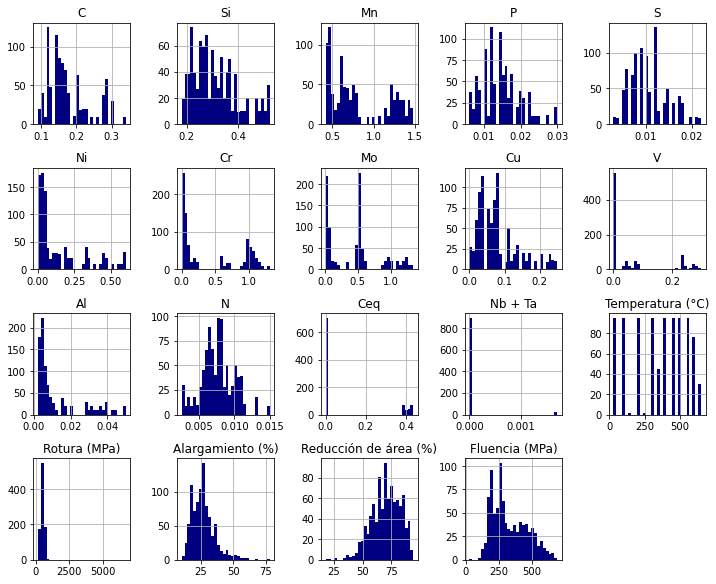

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame df cargado con tus datos

# Crear el gráfico de histogramas para cada columna
DATASET.hist(bins=30, figsize=(10, 10), layout=(5, 5), color='navy')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

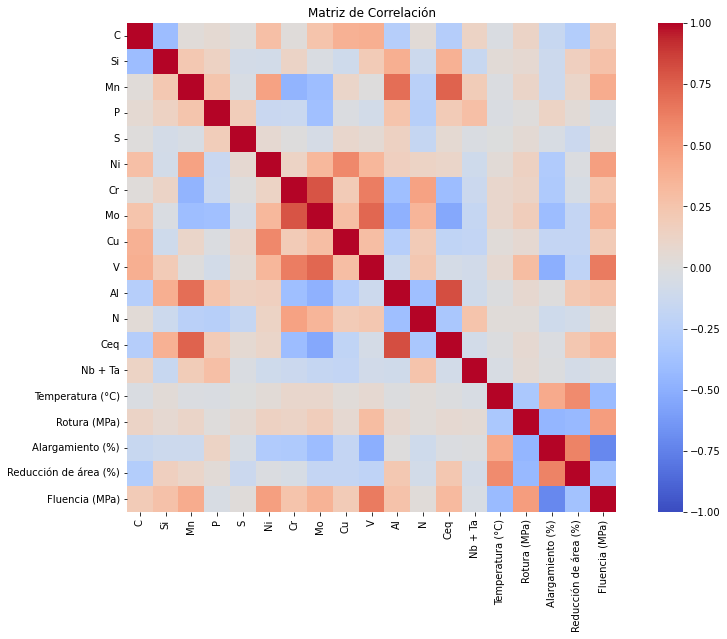

<Figure size 432x288 with 0 Axes>

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df'
# Crear una matriz de correlación
corr_matrix = DATASET.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 9))

# Crear un heatmap con seaborn
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()

# Mostrar el gráfico completo sin scroll
plt.tight_layout()
plt.show()

In [80]:
corr_matrix = DATASET.corr()
corr_matrix['Fluencia (MPa)'].sort_values(ascending=False)


Fluencia (MPa)           1.000000
V                        0.636588
Rotura (MPa)             0.480379
Ni                       0.474990
Mn                       0.399340
Mo                       0.361247
Ceq                      0.315654
Si                       0.269033
Al                       0.258767
Cr                       0.254899
Cu                       0.200388
C                        0.198420
N                        0.024112
S                        0.021205
Nb + Ta                 -0.041306
P                       -0.042454
Reducción de área (%)   -0.371440
Temperatura (°C)        -0.428210
Alargamiento (%)        -0.713544
Name: Fluencia (MPa), dtype: float64

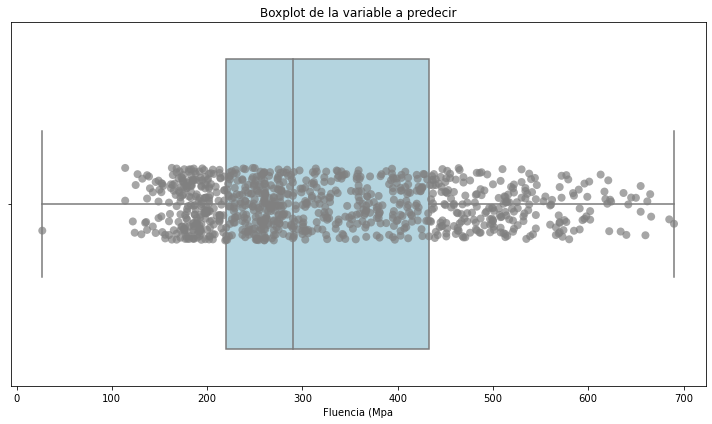

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=DATASET['Fluencia (MPa)'], color='lightblue')

# Agregar puntos
sns.stripplot(x=DATASET['Fluencia (MPa)'], color='grey', alpha=0.7, size=8)

# Títulos y etiquetas
plt.title('Boxplot de la variable a predecir')
plt.xlabel('Fluencia (Mpa')

# Mostrar el gráfico
plt.tight_layout()
plt.show()




In [82]:
# Eliminar filas donde 'Columna_1' tiene valores menores a 100
DATASET = DATASET[DATASET['Fluencia (MPa)'] >= 100]

# Mostrar el DataFrame sin esos valores
print(DATASET)

    Alloy code     C    Si    Mn      P      S     Ni    Cr     Mo    Cu  \
0          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
1          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
2          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
3          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
4          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
..         ...   ...   ...   ...    ...    ...    ...   ...    ...   ...   
910        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
911        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
912        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
913        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
914        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   

         V     Al       N  Ceq  Nb + Ta  Temperatura (°C)  Rotura (MPa)  \
0    0.000  

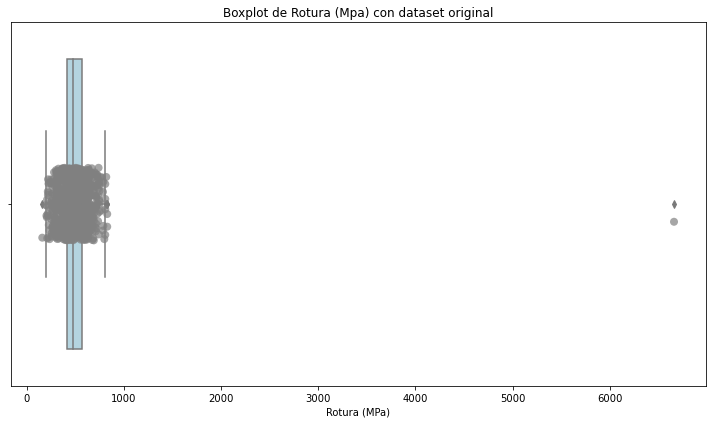

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=DATASET['Rotura (MPa)'], color='lightblue')

# Agregar puntos
sns.stripplot(x=DATASET['Rotura (MPa)'], color='grey', alpha=0.7, size=8)

# Títulos y etiquetas
plt.title('Boxplot de Rotura (Mpa) con dataset original')
plt.xlabel('Rotura (MPa)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [84]:
import pandas as pd


# Calcular los cuartiles
Q1 = DATASET['Rotura (MPa)'].quantile(0.25)
Q3 = DATASET['Rotura (MPa)'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers
DATASET = DATASET[(DATASET['Rotura (MPa)'] >= lower_bound) & (DATASET['Rotura (MPa)'] <= upper_bound)]

# Mostrar el DataFrame original y el limpiado
print("DataFrame original:")
print(DATASET)

DataFrame original:
    Alloy code     C    Si    Mn      P      S     Ni    Cr     Mo    Cu  \
0          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
1          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
2          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
3          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
4          MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
..         ...   ...   ...   ...    ...    ...    ...   ...    ...   ...   
910        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
911        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
912        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
913        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   
914        CCB  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01   

         V     Al       N  Ceq  Nb + Ta  Temperatura (°C)  Rotura (

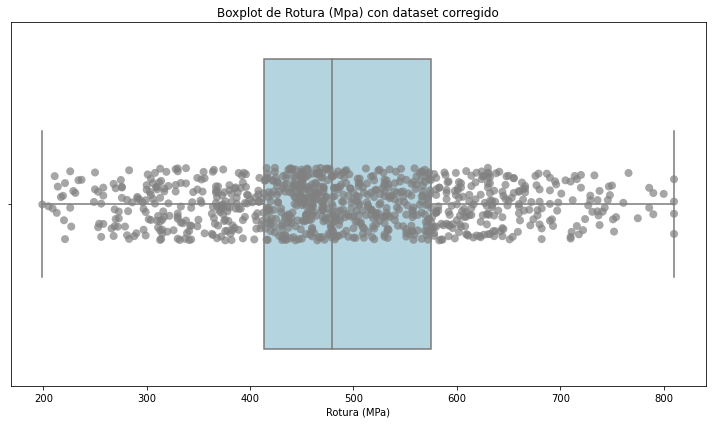

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=DATASET['Rotura (MPa)'], color='lightblue')

# Agregar puntos
sns.stripplot(x=DATASET['Rotura (MPa)'], color='grey', alpha=0.7, size=8)

# Títulos y etiquetas
plt.title('Boxplot de Rotura (Mpa) con dataset corregido')
plt.xlabel('Rotura (MPa)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##### Elimino la columna de "Alloy Code"

In [86]:
DATASET.drop(columns=['Alloy code'], inplace=True)

#### Grafico Ceq (Carbono Equivalente) para corroborar valores nulos, lo cual carece de sentido.

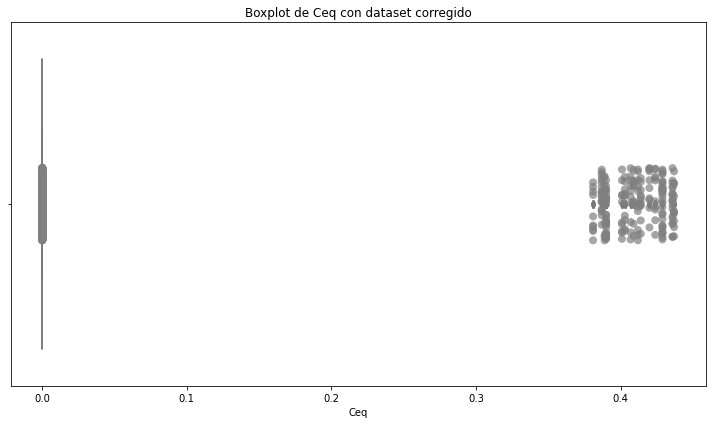

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=DATASET['Ceq'], color='lightblue')

# Agregar puntos
sns.stripplot(x=DATASET['Ceq'], color='grey', alpha=0.7, size=8)

# Títulos y etiquetas
plt.title('Boxplot de Ceq con dataset corregido')
plt.xlabel('Ceq')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Elimino Ceq porque se ven valores nulos, lo cual carece de sentido. Recordar que el Carbono Equivalente surge de una fórmula estandarizada que contiene distintos elementos (C, Mn, etc)

In [90]:
DATASET.drop(columns=['Ceq'], inplace=True)

In [92]:
# Mostrar el DataFrame obtenido hasta ahora
print(DATASET)

        C    Si    Mn      P      S     Ni    Cr     Mo    Cu      V     Al  \
0    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
1    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
2    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
3    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
4    0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04  0.000  0.003   
..    ...   ...   ...    ...    ...    ...   ...    ...   ...    ...    ...   
910  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
911  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
912  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
913  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   
914  0.22  0.22  1.24  0.021  0.008  0.030  0.05  0.017  0.01  0.005  0.005   

          N  Nb + Ta  Temperatura (°C)  Rotura (MPa

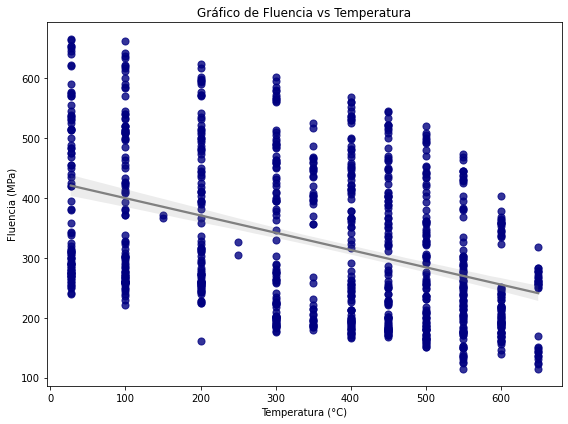

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET = pd.DataFrame(DATASET)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.regplot(x='Temperatura (°C)', y='Fluencia (MPa)', data=DATASET, color='navy', scatter_kws={'s': 50}, line_kws={'color': 'grey'})


# Títulos y etiquetas
plt.title('Gráfico de Fluencia vs Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Fluencia (MPa)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La Temperatura tiene una influencia significativa en la Fluencia del material. A mayor Temperatura, menor es la Fluencia obtenida lo cual es esperable según la teoría metalúrgica si se mantiene fija la concentración de los elementos. El gráfico de puntos de la Figura 20, muestra dicha correlación:

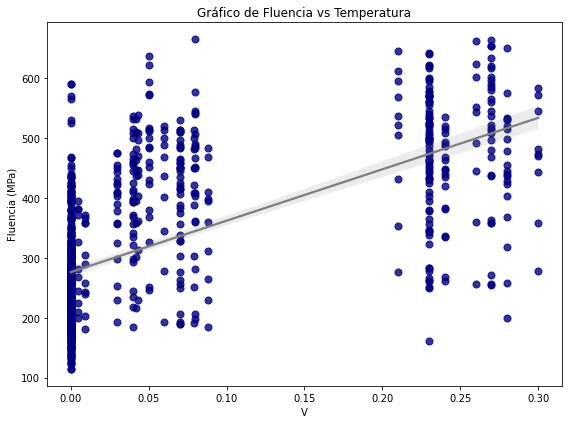

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET = pd.DataFrame(DATASET)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.regplot(x='V', y='Fluencia (MPa)', data=DATASET, color='navy', scatter_kws={'s': 50}, line_kws={'color': 'grey'})


# Títulos y etiquetas
plt.title('Gráfico de Fluencia vs Temperatura')
plt.xlabel('V')
plt.ylabel('Fluencia (MPa)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

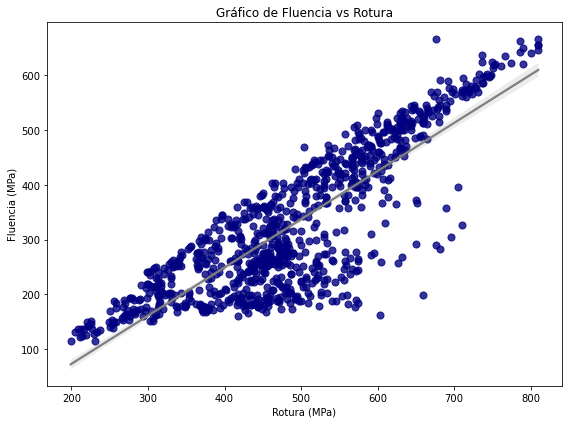

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET = pd.DataFrame(DATASET)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.regplot(x='Rotura (MPa)', y='Fluencia (MPa)', data=DATASET, color='navy', scatter_kws={'s': 50}, line_kws={'color': 'grey'})


# Títulos y etiquetas
plt.title('Gráfico de Fluencia vs Rotura')
plt.xlabel('Rotura (MPa)')
plt.ylabel('Fluencia (MPa)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [97]:
DATASET.describe().round(3)

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Nb + Ta,Temperatura (°C),Rotura (MPa),Alargamiento (%),Reducción de área (%),Fluencia (MPa)
count,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000,909.000
mean,0.175,0.311,0.813,0.015,0.011,0.142,0.425,0.440,0.079,0.059,0.012,0.008,0.000,352.293,488.877,26.836,70.264,327.097
std,0.059,0.087,0.343,0.005,0.004,0.173,0.456,0.392,0.059,0.096,0.013,0.002,0.000,189.186,124.224,8.789,12.327,129.974
min,0.090,0.180,0.420,0.006,0.003,0.000,0.000,0.005,0.000,0.000,0.002,0.002,0.000,27.000,199.000,10.000,18.000,114.000
25%,0.130,0.240,0.500,0.010,0.008,0.023,0.040,0.050,0.040,0.000,0.004,0.006,0.000,200.000,413.000,21.000,62.000,220.000
50%,0.160,0.300,0.680,0.014,0.010,0.050,0.110,0.500,0.070,0.000,0.006,0.008,0.000,400.000,479.000,26.000,71.000,290.000
75%,0.200,0.370,1.210,0.018,0.012,0.210,0.990,0.560,0.110,0.070,0.016,0.009,0.000,500.000,575.000,31.000,80.000,431.000
max,0.340,0.520,1.480,0.030,0.022,0.600,1.310,1.350,0.250,0.300,0.050,0.015,0.002,650.000,810.000,78.000,94.000,666.000


In [98]:
import pandas as pd

# Guardar el dataset en un archivo .xlsm
DATASET.to_excel('C:/Users/60056808/Desktop/Trabajo Final Magister/TP final Maestria MMA/Jupyter avances/data/dataset_final.xlsm', engine='openpyxl', index=False)


In [65]:
import pandas as pd

# Guardar el dataset en un archivo .csv
DATASET.to_csv('C:/Users/60056808/Desktop/Trabajo Final Magister/TP final Maestria MMA/Jupyter avances/data/dataset_final.csv', index=False)

print("El archivo CSV ha sido guardado exitosamente.")


El archivo CSV ha sido guardado exitosamente.
